In [ ]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import random

In [ ]:
with open("netscience.csv") as infile:
  csv_reader = csv.reader(infile)
  G=nx.Graph(csv_reader)

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 379
Number of edges: 914
Average degree:   4.8232


In [ ]:
def deg_cen(G):
  #joining nodes and degree together and sorted in decreasing order
  NodesDegree=sorted(nx.degree_centrality(G).items(), key = lambda x: x[1], reverse = True)
  output=[] #output array for rank of nodes of degree centrality
  output2=[]
  for i in range(len(NodesDegree)):
    output.append(NodesDegree[i][0])
    output2.append(NodesDegree[i][1])
  return [output,output2]
[x1,x2]=deg_cen(G)
print(x1)
print(x2)


['4', '5', '26', '16', '67', '70', '95', '15', '113', '51', '32', '201', '231', '52', '169', '131', '8', '21', '42', '170', '100', '214', '303', '23', '33', '85', '86', '88', '1', '45', '236', '65', '24', '119', '13', '69', '17', '40', '106', '30', '83', '135', '212', '46', '47', '128', '176', '177', '18', '334', '107', '150', '91', '92', '97', '199', '202', '108', '239', '240', '49', '102', '81', '348', '349', '350', '351', '82', '84', '87', '89', '132', '96', '270', '246', '250', '126', '127', '204', '7', '10', '172', '140', '125', '76', '304', '41', '66', '116', '110', '194', '60', '265', '71', '72', '122', '130', '133', '134', '94', '93', '98', '99', '185', '114', '352', '353', '354', '355', '356', '245', '313', '314', '68', '258', '220', '232', '233', '104', '155', '35', '43', '241', '242', '243', '244', '160', '56', '299', '101', '73', '75', '262', '263', '145', '115', '207', '184', '186', '211', '210', '213', '215', '257', '44', '14', '61', '164', '165', '166', '323', '324', '33

In [ ]:
def bet_cen(G):
  bet=nx.betweenness_centrality(G)
  p=sorted(bet.items(), key = lambda x: x[1], reverse = True)
  output=[] #output array for rank of nodes of degree centrality
  output2=[]
  for i in range(len(p)):
    output.append(p[i][0])
    output2.append(p[i][1])
  return [output,output2]
[x1,x2]=bet_cen(G)
# print(x1)
# print(x2)

In [ ]:
def close_cen(G):
  close=sorted(nx.closeness_centrality(G).items(),key = lambda x:x[1],reverse=True)
  output=[]
  output2=[]
  for i in range(len(close)):
    output.append(close[i][0])
    output2.append(close[i][1])
  return [output,output2]
# close_cen(G)

In [ ]:
def local_cen(G):
  N={}  #dictionary list for storing neighbour and next neighbour of node
  for i in G.nodes:  # traversing through nodes
    l=G[i]           #neighbour of node i
    # print(i,G[i])
    k=[]             #storing the total neighbour of i
    for j in l:
      k.append(j)
    # print(k)
    for j in l:    #traversing neighbour of neighbour of node i
      x=G[j]
      for p in x:
        if p not in k and p!=i:      #removing duplicate value
          k.append(p)
    # print(k)
    N[i]=len(k)     #no of neighbour and next neighbour
  # print(N)
  local={}         #finding local centrality
  for i in G.nodes:
    l=G[i]
    ans=0
    for j in l:
      ans+=N[j]
    local[i]=ans
  # print(local)
  local=sorted(local.items(),key = lambda x:x[1],reverse=True)  #soring according to centrality
  # print(local)
  output=[]
  output2=[]
  for i in range(len(local)):
    output.append(local[i][0])
    output2.append(local[i][1])
  return [output,output2]
[x1,x2]=local_cen(G)
# print(x1)
# print(x2)

In [ ]:
[DegreeRank,DegreeCen]=deg_cen(G)
[CloseRank,CloseCen]=close_cen(G)
[BetweenRank,BetweenCen]=bet_cen(G)
[LocalRank,LocalCen]=local_cen(G)
# print(Degree)
# print(Close)
# print(Between)
# print(Local)

In [ ]:
def SIR(G,Centrality,t,rank):
  k=2*nx.number_of_edges(G)/nx.number_of_nodes(G)
  k=1/k  #average degree of graph for recovery
  Infected=[]    #infected array
  Recovered=[]   #Recovered array
  Infected.append(Centrality[rank])
  Time=1
  ans=1
  while(Time<t):
    NewInf = []   #array for new Infected node
    for i in Infected:
      temp=G[i]     #neighbour of node i
      l=[]   #list of neighbour
      for j in temp:
        l.append(j)
      Sus=[]     #suseptible for node i
      for j in l:
        if j not in Recovered and j not in Infected:
          Sus.append(j)
       
      if len(Sus)>0:   #if size of susceptible is greter than 0 then random;y infect  1 node
        x = random.randint(0,len(Sus)-1)
        NewInf.append(Sus[x])
    for i in NewInf:
      if i not in Infected:
       Infected.append(i)
    p=[]
    for i in Infected:
      y=random.uniform(0,1)
      if y<=k :
        Recovered.append(i)
        p.append(i)
    Infected = [ele for ele in Infected if ele not in p]   #remove Recovered nodes
    # print(Infected)
    ans=len(Infected)+len(Recovered)   #parameter F
    Time+=1
  return ans


In [ ]:
def Simulation(G,Centrality,NoOfSimulation):
  size=len(Centrality)
  ans=[]
  for i in range(size):   #iterate over rank of node in centrality
    temp=0
    for j in range(NoOfSimulation):   #simulate for NoOfSimulation time
      temp+=SIR(G,Centrality,10,i)
    temp/=NoOfSimulation
    ans.append(temp)   #average parameter value
  return ans



Text(0, 0.5, 'F(t)')

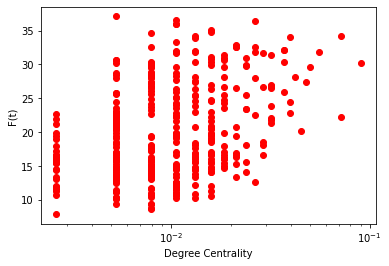

In [ ]:
D1=Simulation(G,DegreeRank,100)
plt.plot(DegreeCen,D1,'ro')
plt.xscale("log")
plt.xlabel("Degree Centrality")
plt.ylabel("F(t)")


Text(0, 0.5, 'F(t)')

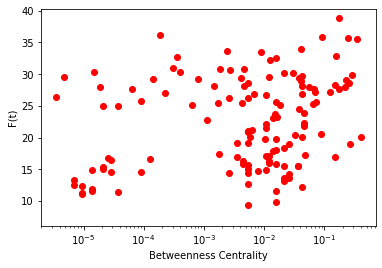

In [ ]:
B1=Simulation(G,BetweenRank,100)
plt.plot(BetweenCen,B1,'ro')
plt.xscale("log")
plt.xlabel("Betweenness Centrality")
plt.ylabel("F(t)")

Text(0, 0.5, 'F(t)')

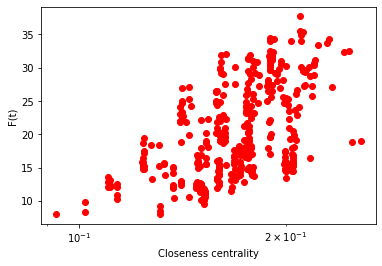

In [ ]:
C1=Simulation(G,CloseRank,100)
plt.plot(CloseCen,C1,'ro')
plt.xscale("log")
plt.xlabel("Closeness centrality")
plt.ylabel("F(t)")


Text(0, 0.5, 'F(t)')

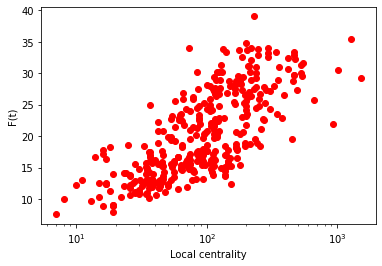

In [ ]:
L1=Simulation(G,LocalRank,100)
plt.plot(LocalCen,L1,'ro')
plt.xscale("log")
plt.xlabel("Local centrality")
plt.ylabel("F(t)")
# print(L1)
# print(LocalCen)

In [ ]:
N=350
Ra=[]
D2=[]
B2=[]
C2=[]
L2=[]
sum=0
for i in range(N):
  Ra.append(i+1)
  sum+=D1[i]
  D2.append(sum/(i+1))
sum=0
for i in range(N):
  sum+=B1[i]
  B2.append(sum/(i+1))
sum=0
for i in range(N):
  sum+=C1[i]
  C2.append(sum/(i+1))
sum=0
for i in range(N):
  sum+=L1[i]
  L2.append(sum/(i+1))




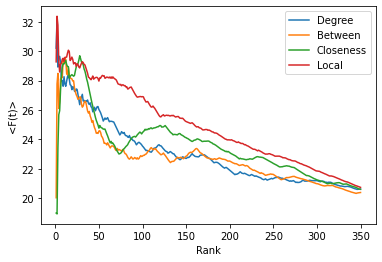

In [ ]:
plt.plot(Ra,D2,label="Degree")
plt.plot(Ra,B2,label="Between")
plt.plot(Ra,C2,label="Closeness")
plt.plot(Ra,L2,label="Local")
plt.xlabel("Rank")
plt.ylabel("<F(t)>")
plt.legend()
plt.show()